In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [11]:
# Exerice 1

cac40 = [
    "AI.PA", "AIR.PA", "ALO.PA", "MT.PA", "CS.PA", "BNP.PA", "EN.PA", "CAP.PA",
    "CA.PA", "ACA.PA", "BN.PA", "DSY.PA", "EDEN.PA", "ENGI.PA", "EL.PA",
    "ERF.PA", "RMS.PA", "KER.PA", "OR.PA", "LR.PA", "MC.PA", "ML.PA",
    "ORA.PA", "RI.PA", "PUB.PA", "RNO.PA", "SAF.PA", "SGO.PA", "SAN.PA",
    "SU.PA", "GLE.PA", "STLA.PA", "STM.PA", "TEP.PA", "HO.PA", "TTE.PA",
    "URW.PA", "VIE.PA", "DG.PA", "VIV.PA"
]

top50_us = [
    "AAPL", "MSFT", "NVDA", "AMZN", "META", "GOOGL", "GOOG", "BRK-B", "TSLA",
    "JPM", "V", "LLY", "UNH", "XOM", "MA", "AVGO", "PG", "COST", "HD",
    "MRK", "PEP", "ABBV", "CVX", "KO", "WMT", "ADBE", "CRM", "BAC",
    "NFLX", "ORCL", "TMO", "ACN", "MCD", "CSCO", "ABT", "LIN", "INTC",
    "AMD", "DHR", "NKE", "QCOM", "TXN", "VZ", "PM", "RTX", "NEE", "AMAT",
    "INTU", "HON"
]

forex = ["EURUSD=X"]

indices = [
    "^FCHI",   # CAC 40
    "^DJI",    # Dow Jones
    "^IXIC",   # Nasdaq Composite
    "^RUT",    # Russell 2000
    "^VIX",    # VIX
    "^GSPC"    # S&P 500
]

crypto = [
    "BTC-USD", "ETH-USD", "XRP-USD",
    "SOL-USD", "BNB-USD", "DOGE-USD"
]

# Univers complet
universe = ( cac40 +top50_us + forex + indices + crypto)
universe = sorted(set(universe))
print(f"Nombre total d'actifs : {len(universe)}")
print(universe)

# Data Download
prices = yf.download(
    universe,
    start="2018-01-01",
    auto_adjust=True,
    progress=False
)["Close"]

print(prices.head())

Nombre total d'actifs : 102
['AAPL', 'ABBV', 'ABT', 'ACA.PA', 'ACN', 'ADBE', 'AI.PA', 'AIR.PA', 'ALO.PA', 'AMAT', 'AMD', 'AMZN', 'AVGO', 'BAC', 'BN.PA', 'BNB-USD', 'BNP.PA', 'BRK-B', 'BTC-USD', 'CA.PA', 'CAP.PA', 'COST', 'CRM', 'CS.PA', 'CSCO', 'CVX', 'DG.PA', 'DHR', 'DOGE-USD', 'DSY.PA', 'EDEN.PA', 'EL.PA', 'EN.PA', 'ENGI.PA', 'ERF.PA', 'ETH-USD', 'EURUSD=X', 'GLE.PA', 'GOOG', 'GOOGL', 'HD', 'HO.PA', 'HON', 'INTC', 'INTU', 'JPM', 'KER.PA', 'KO', 'LIN', 'LLY', 'LR.PA', 'MA', 'MC.PA', 'MCD', 'META', 'ML.PA', 'MRK', 'MSFT', 'MT.PA', 'NEE', 'NFLX', 'NKE', 'NVDA', 'OR.PA', 'ORA.PA', 'ORCL', 'PEP', 'PG', 'PM', 'PUB.PA', 'QCOM', 'RI.PA', 'RMS.PA', 'RNO.PA', 'RTX', 'SAF.PA', 'SAN.PA', 'SGO.PA', 'SOL-USD', 'STLA.PA', 'STM.PA', 'SU.PA', 'TEP.PA', 'TMO', 'TSLA', 'TTE.PA', 'TXN', 'UNH', 'URW.PA', 'V', 'VIE.PA', 'VIV.PA', 'VZ', 'WMT', 'XOM', 'XRP-USD', '^DJI', '^FCHI', '^GSPC', '^IXIC', '^RUT', '^VIX']



2 Failed downloads:
['STM.PA', 'STLA.PA']: YFTzMissingError('possibly delisted; no timezone found')


Ticker           AAPL       ABBV        ABT    ACA.PA         ACN        ADBE  \
Date                                                                            
2018-01-01        NaN        NaN        NaN       NaN         NaN         NaN   
2018-01-02  40.341888  69.901627  51.080379  8.139381  136.707809  177.699997   
2018-01-03  40.334869  70.995506  51.193340  8.188907  137.338760  181.039993   
2018-01-04  40.522213  70.590630  51.106449  8.558876  138.964951  183.220001   
2018-01-05  40.983566  71.819458  51.254158  8.544311  140.111298  185.339996   

Ticker          AI.PA     AIR.PA     ALO.PA       AMAT  ...         VZ  \
Date                                                    ...              
2018-01-01        NaN        NaN        NaN        NaN  ...        NaN   
2018-01-02  66.869133  74.994926  27.346342  48.434593  ...  34.813725   
2018-01-03  67.381050  76.236534  27.684731  49.292969  ...  34.098331   
2018-01-04  68.916794  77.777222  27.960163  49.576046  ...  3

In [12]:
# Exercise 2
START_DATE = "2020-01-01"
DATA_DIR = "data_cache"

DESCRIPTIVE_FILE = f"{DATA_DIR}/descriptive_data.pkl"
PRICES_FILE = f"{DATA_DIR}/prices_adj.pkl"

os.makedirs(DATA_DIR, exist_ok=True)

# ----------------------------
# Universe (example)
# ----------------------------
tickers = [
    "AAPL", "MSFT", "NVDA",        # US equities
    "AI.PA", "AIR.PA",             # CAC40 equities
    "EURUSD=X",                    # Forex
    "^GSPC", "^DJI", "^IXIC",      # Indices
    "BTC-USD", "ETH-USD"           # Crypto
]

# ============================================================
# 1) Descriptive data
# ============================================================

if os.path.exists(DESCRIPTIVE_FILE):
    descriptive_data = pd.read_pickle(DESCRIPTIVE_FILE)

else:
    data = []
    for ticker in tickers:
        info = yf.Ticker(ticker).info
        data.append({
            "ticker": ticker,
            "name": info.get("shortName"),
            "currency": info.get("currency"),
            "exchange": info.get("exchange"),
            "asset_type": info.get("quoteType"),
            "sector": info.get("sector"),
            "country": info.get("country")
        })

    descriptive_data = pd.DataFrame(data).set_index("ticker")
    descriptive_data.to_pickle(DESCRIPTIVE_FILE)

# ============================================================
# 2) Historical adjusted prices
# ============================================================

if os.path.exists(PRICES_FILE):
    prices = pd.read_pickle(PRICES_FILE)

else:
    prices = yf.download(
        tickers,
        start=START_DATE,
        auto_adjust=True,
        progress=False
    )["Close"]

    prices.to_pickle(PRICES_FILE)

# ============================================================
# 3) Output check
# ============================================================

print("Descriptive data:")
print(descriptive_data, "\n")

print("Adjusted prices (head):")
print(prices.head())

print("\nPeriod:", prices.index.min(), "→", prices.index.max())
print("Number of assets:", prices.shape[1])

Descriptive data:
                                  name currency exchange      asset_type  \
ticker                                                                     
AAPL                        Apple Inc.      USD      NMS          EQUITY   
MSFT             Microsoft Corporation      USD      NMS          EQUITY   
NVDA                NVIDIA Corporation      USD      NMS          EQUITY   
AI.PA                      AIR LIQUIDE      EUR      PAR          EQUITY   
AIR.PA                       AIRBUS SE      EUR      PAR          EQUITY   
EURUSD=X                       EUR/USD      USD      CCY        CURRENCY   
^GSPC                          S&P 500      USD      SNP           INDEX   
^DJI      Dow Jones Industrial Average      USD      DJI           INDEX   
^IXIC                 NASDAQ Composite      USD      NIM           INDEX   
BTC-USD                    Bitcoin USD      USD      CCC  CRYPTOCURRENCY   
ETH-USD                   Ethereum USD      USD      CCC  CRYPTOCURREN

In [13]:
# Exercise 3

# 0) Load prices 
# ------------------------------------------------------------
prices = pd.read_pickle("data_cache/prices_adj.pkl")

# 1) Format matriciel + dates croissantes
prices = prices.sort_index()          # dates croissantes
prices = prices.ffill()               # données manquantes → valeur précédente


eurusd = prices["EURUSD=X"]
prices_eur = prices.div(eurusd, axis=0)

eur_assets = [
    col for col in prices.columns
    if col.endswith(".PA") or col in ["^FCHI"]
]

prices_eur[eur_assets] = prices[eur_assets]

# ------------------------------------------------------------
# 3) Performance arithmétique (matricielle)
# ------------------------------------------------------------
returns = prices_eur.pct_change()

# ------------------------------------------------------------
# 4) Outputs (checks)
# ------------------------------------------------------------
print("Prix en EUR (head):")
print(prices_eur.head(), "\n")

print("Rendements arithmétiques (head):")
print(returns.head(), "\n")

print("Dimensions matrice prix :", prices_eur.shape)
print("Dimensions matrice rendements :", returns.shape)

Prix en EUR (head):
Ticker           AAPL      AI.PA      AIR.PA      BTC-USD     ETH-USD  \
Date                                                                    
2020-01-01        NaN        NaN         NaN  6416.795318  116.570744   
2020-01-02  64.583721  93.452415  124.759399  6225.451023  113.547951   
2020-01-03  64.238577  93.157387  125.245262  6574.699340  120.102455   
2020-01-04  64.238577  93.157387  125.245262  6633.574898  120.905986   
2020-01-05  64.238577  93.157387  125.245262  6634.166267  121.986789   

Ticker      EURUSD=X        MSFT      NVDA          ^DJI        ^GSPC  \
Date                                                                    
2020-01-01       1.0         NaN       NaN           NaN          NaN   
2020-01-02       1.0  135.913085  5.321424  25727.875124  2903.395992   
2020-01-03       1.0  134.814078  5.259398  25632.225803  2895.643553   
2020-01-04       1.0  134.814078  5.259398  25632.225803  2895.643553   
2020-01-05       1.0  134.8140

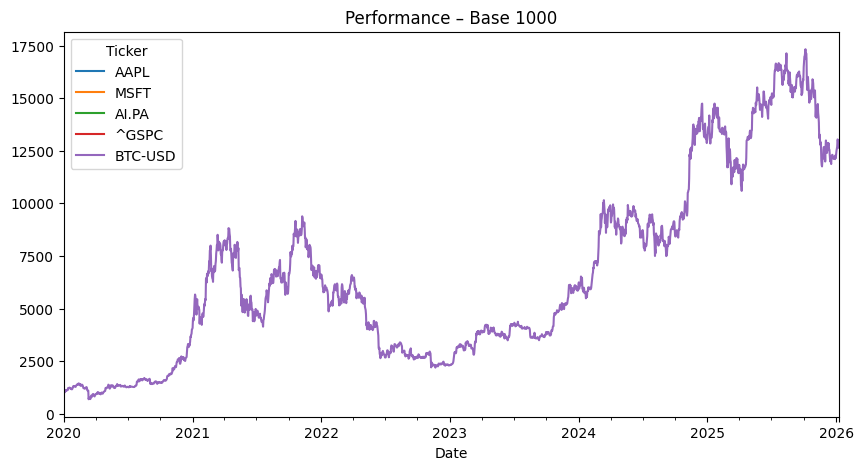

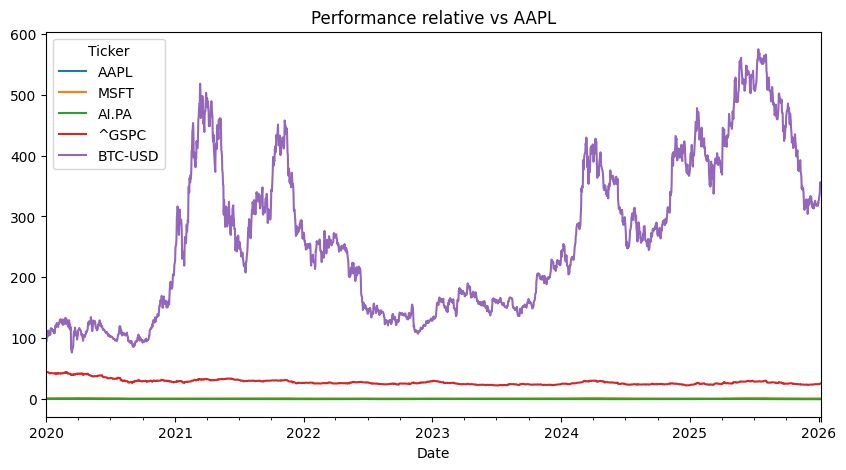

C:\Users\ilyes\AppData\Local\Temp\ipykernel_21080\630307041.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns_2024 = prices_2024.resample("M").last().pct_change()


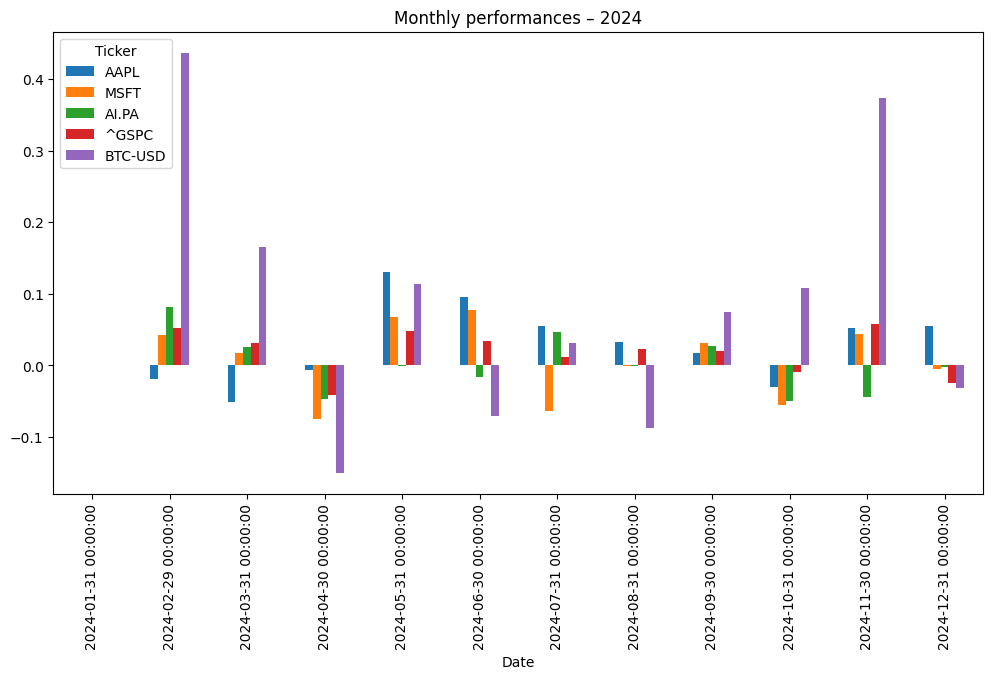

                          Name            Type           Sector  \
AAPL                Apple Inc.          EQUITY       Technology   
MSFT     Microsoft Corporation          EQUITY       Technology   
AI.PA              AIR LIQUIDE          EQUITY  Basic Materials   
^GSPC                  S&P 500           INDEX             None   
BTC-USD            Bitcoin USD  CRYPTOCURRENCY             None   

               Country  Total return  Last year  Year -2      1M      3M  
AAPL     United States        2.5479     0.2563  -0.0927 -0.0605 -0.0414  
MSFT     United States        2.1351     0.1043   0.0486 -0.0161 -0.0358  
AI.PA           France        0.6663    -0.1442   0.1164 -0.0237 -0.0803  
^GSPC             None        1.1259     0.2179   0.0092  0.0134  0.0293  
BTC-USD           None       11.6531    -0.0599   0.5120  0.0341 -0.1187  


In [16]:
# Exercise 4
prices_eur = pd.read_pickle("data_cache/prices_adj.pkl")   # prix déjà en EUR
descriptive_data = pd.read_pickle("data_cache/descriptive_data.pkl")

assets = [
    "AAPL", "MSFT", "AI.PA", "^GSPC", "BTC-USD"
]

prices = prices_eur[assets].sort_index().ffill()

# ------------------------------------------------------------
# 1) Courbes de performance (base 1000)
# ------------------------------------------------------------
perf_base1000 = prices / prices.iloc[0] * 1000

perf_base1000.plot(figsize=(10, 5), title="Performance – Base 1000")
plt.show()

# ------------------------------------------------------------
# 2) Performance relative vs premier actif
# ------------------------------------------------------------
ref = perf_base1000.iloc[:, 0]
perf_relative = prices.div(prices.iloc[:, 0], axis=0) - 1

perf_relative.plot(figsize=(10, 5), title=f"Performance relative vs {assets[0]}")
plt.show()

# ------------------------------------------------------------
# 3) Performances mensuelles sur 2024 (bar chart)
# ------------------------------------------------------------
prices_2024 = prices.loc["2024-01-01":"2024-12-31"]
monthly_returns_2024 = prices_2024.resample("M").last().pct_change()

monthly_returns_2024.plot(
    kind="bar",
    figsize=(12, 6),
    title="Monthly performances – 2024"
)
plt.show()

# ------------------------------------------------------------
# 4) Tableau d’indicateurs de performance
# ------------------------------------------------------------
returns = prices.pct_change()

def annualized_return(r):
    return (1 + r.mean()) ** 252 - 1

indicators = pd.DataFrame(index=assets)

# Descriptif
indicators["Name"] = descriptive_data.loc[assets, "name"]
indicators["Type"] = descriptive_data.loc[assets, "asset_type"]
indicators["Sector"] = descriptive_data.loc[assets, "sector"]
indicators["Country"] = descriptive_data.loc[assets, "country"]

# Performances (EUR)
first_prices = prices.apply(lambda x: x.dropna().iloc[0])
last_prices = prices.apply(lambda x: x.dropna().iloc[-1])

indicators["Total return"] = last_prices / first_prices - 1
indicators["Last year"] = prices.iloc[-1] / prices.loc[prices.index >= prices.index[-252]].iloc[0] - 1
indicators["Year -2"] = prices.loc[prices.index >= prices.index[-504]].iloc[-252] / prices.loc[prices.index >= prices.index[-504]].iloc[0] - 1
indicators["1M"] = prices.iloc[-1] / prices.iloc[-21] - 1
indicators["3M"] = prices.iloc[-1] / prices.iloc[-63] - 1

print(indicators.round(4))